In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [7]:
df.shape

(2392, 15)

In [8]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [10]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [21]:
df.GradeClass.unique().dtype

dtype('float64')

In [22]:
df.drop(columns=["StudentID"], axis = 1, inplace=True)
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

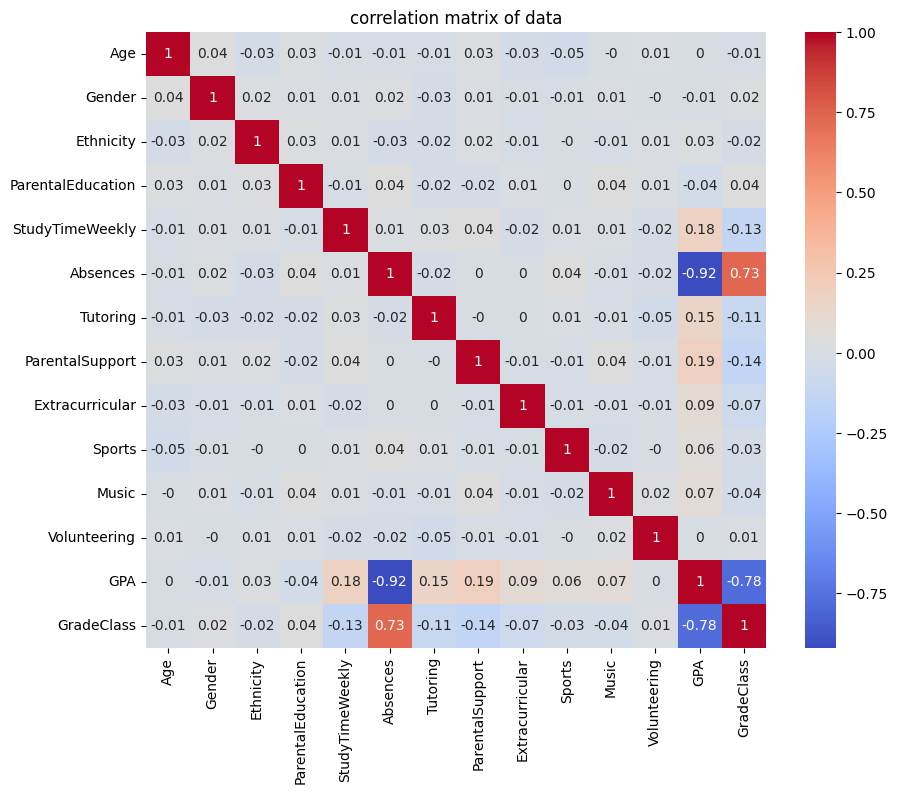

In [26]:
plt.figure(figsize=(10, 8))
corr = round(df.corr(), 2)
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.title("correlation matrix of data")
plt.show()

In [27]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

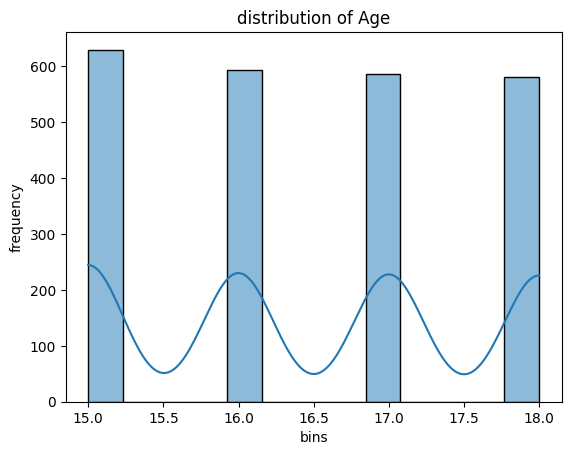

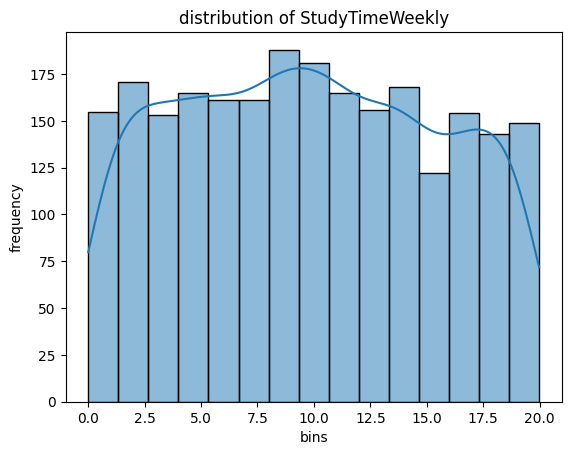

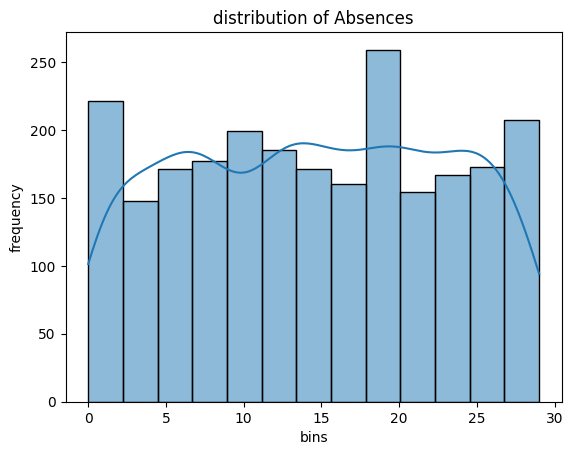

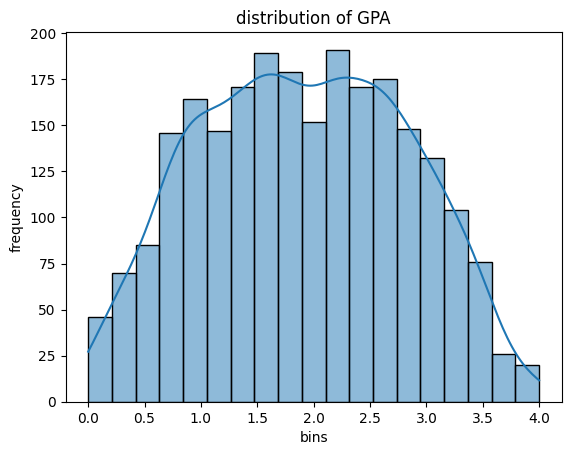

In [28]:
for i in df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]:
    sns.histplot(df[i], kde = True)
    plt.title(f"distribution of {i}")
    plt.xlabel("bins")
    plt.ylabel("frequency")
    plt.show()

In [29]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [30]:
X = df.drop(columns=["GradeClass"])
y = df["GradeClass"]

X.shape, y.shape

((2392, 13), (2392,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape

((2033, 13), (359, 13))

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
lr_pred = lr.predict(X_test_scaled)
lr_pred.shape

(359,)

In [ ]:
lr_mse = mean_absolute_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

print("lr mse: ", lr_mse)
print("lr mae: ", lr_mae)

lr mse:  0.5555574577533792
lr mae:  0.5555574577533792


In [38]:
df.GradeClass.unique()

array([2., 1., 4., 3., 0.])

In [39]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [40]:
df.ParentalEducation.corr(df.ParentalSupport)

np.float64(-0.017463037639936053)

In [69]:
df1 = df.drop(columns=["Age", "Gender", "Extracurricular", "Sports", "Music", "Volunteering"])
df1.head()

,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass
0,0,2,19.833723,7,1,2,2.929196,2.0
1,0,1,15.408756,0,0,1,3.042915,1.0
2,2,3,4.210570,26,0,2,0.112602,4.0
3,0,3,10.028829,14,0,3,2.054218,3.0
4,0,2,4.672495,17,1,3,1.288061,4.0


In [70]:
X1 = df1.drop(columns=["GradeClass"])
y1 = df1["GradeClass"]


In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

In [72]:
#from sklearn.preprocessing import minmax_scale

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

In [73]:
lr1 = LinearRegression()
lr1.fit(X1_train_scaled, y1_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
lr1_pred = lr1.predict(X1_test)
print("lr1 mse: ", mean_squared_error(y1_test, lr1_pred))
print("lr1 mae: ", mean_absolute_error(y1_test, lr1_pred))

lr1 mse:  1.1417936219593492
lr1 mae:  0.8800503202757196


d:\west London\student_score_prediction\ml_venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [77]:
from sklearn.metrics import root_mean_squared_error
print("lr rmse: ", root_mean_squared_error(y_test, lr_pred))
print("lr1 rmse: ", root_mean_squared_error(y1_test, lr1_pred))

lr rmse:  0.7630409871179329
lr1 rmse:  1.0685474355213946


In [78]:
#polynomial regression
X.shape, y.shape

((2392, 13), (2392,))

In [79]:
X_train.shape, X_test.shape

((2033, 13), (359, 13))

In [80]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

In [81]:
lr2 = LinearRegression()
lr2.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
lr2_pred = lr2.predict(x_test_poly)
print("poly mse: ", mean_squared_error(y_test,lr2_pred))
print("poly mae: ", mean_absolute_error(y_test, lr2_pred))
print("ploy rmse: ", root_mean_squared_error(y_test, lr2_pred))

poly mse:  0.4298657204715712
poly mae:  0.3844447557869865
ploy rmse:  0.6556414572550848


In [83]:
#scaling poly features 
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.fit_transform(x_test_poly)

lr3 = LinearRegression()
lr3.fit(x_train_poly_scaled, y_train)

lr3_pred = lr3.predict(x_test_poly_scaled)
print("lr3 mse: ", mean_squared_error(y_test, lr3_pred))
print("lr3 mae: ", mean_absolute_error(y_test, lr3_pred))
print("lr3 rmse: ", root_mean_squared_error(y_test, lr3_pred))


lr3 mse:  0.4457166273539735
lr3 mae:  0.3976278724453417
lr3 rmse:  0.6676201220409503
